<a href="https://colab.research.google.com/github/ElsaMolina/AluraStore_Draft/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [31]:
import pandas as pd
tienda = pd.read_csv(url)
#IngresoT = Ingreso Total

IngresoT_Tienda1 = tienda["Precio"].sum()
IngresoT_Tienda2 = tienda2["Precio"].sum()
IngresoT_Tienda3 = tienda3["Precio"].sum()
IngresoT_Tienda4 = tienda4["Precio"].sum()

print(f"Desglose de los ingresos totales por tienda:")
print(f"Tienda 1: {IngresoT_Tienda1}")
print(f"Tienda 2: {IngresoT_Tienda2}")
print(f"Tienda 3: {IngresoT_Tienda3}")
print(f"Tienda 4: {IngresoT_Tienda4}")

Desglose de los ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


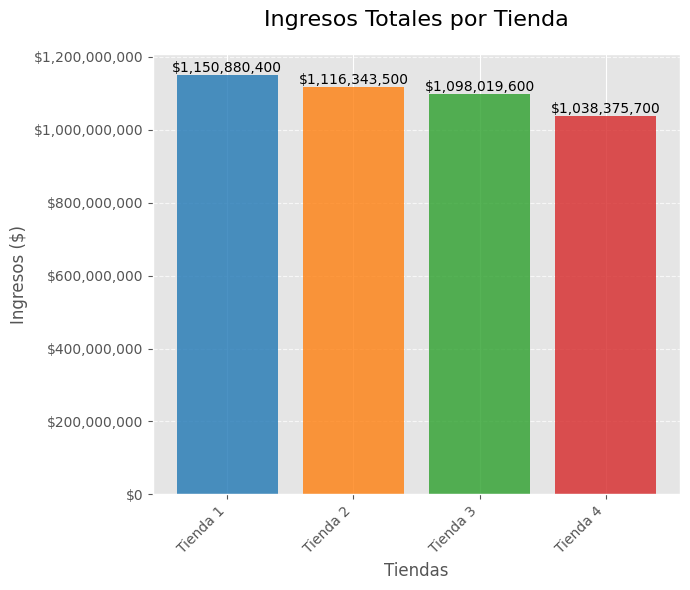

In [37]:
import matplotlib.pyplot as plt
import numpy as np

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [IngresoT_Tienda1, IngresoT_Tienda2, IngresoT_Tienda3, IngresoT_Tienda4]

plt.figure(figsize=(7, 6))
bars = plt.bar(tiendas, ingresos, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.8)

plt.title('Ingresos Totales por Tienda', fontsize=16, pad=20)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter('${x:,.0f}')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom',
             fontsize=10)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<ipython-input-22-0c6d532db735>:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  datos_completos['Fecha de Compra'] = pd.to_datetime(datos_completos['Fecha de Compra'], errors='coerce')


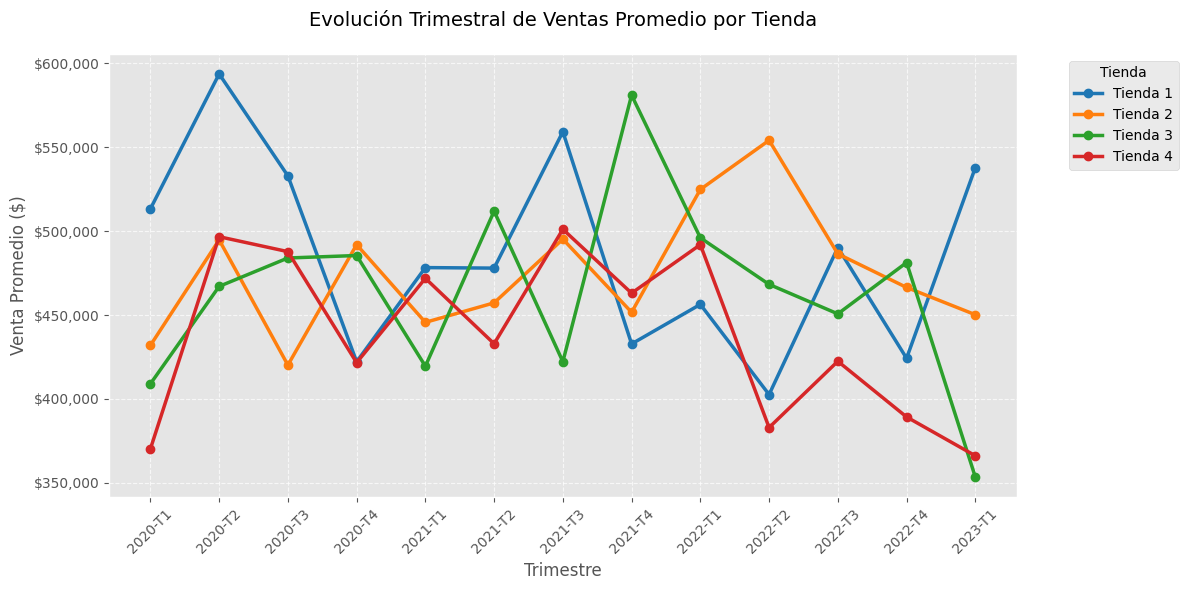

In [22]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

dfs = []
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    df['Tienda'] = f'Tienda {i}'
    dfs.append(df)

datos_completos = pd.concat(dfs)

datos_completos['Fecha de Compra'] = pd.to_datetime(datos_completos['Fecha de Compra'], errors='coerce')
datos_completos['Año'] = datos_completos['Fecha de Compra'].dt.year
datos_completos['Trimestre'] = datos_completos['Fecha de Compra'].dt.quarter
datos_completos['Año-Trimestre'] = datos_completos['Año'].astype(str) + '-T' + datos_completos['Trimestre'].astype(str)

ventas_trimestrales = datos_completos.groupby(['Tienda', 'Año-Trimestre'])['Precio'].mean().reset_index()

orden_trimestres = sorted(ventas_trimestrales['Año-Trimestre'].unique())
ventas_trimestrales['Año-Trimestre'] = pd.Categorical(ventas_trimestrales['Año-Trimestre'], categories=orden_trimestres, ordered=True)
ventas_trimestrales = ventas_trimestrales.sort_values(['Tienda', 'Año-Trimestre'])

plt.figure(figsize=(12, 6))

colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, tienda in enumerate(ventas_trimestrales['Tienda'].unique()):
    datos_tienda = ventas_trimestrales[ventas_trimestrales['Tienda'] == tienda]
    plt.plot(datos_tienda['Año-Trimestre'],
             datos_tienda['Precio'],
             marker='o',
             label=tienda,
             color=colores[i],
             linewidth=2.5)

plt.title('Evolución Trimestral de Ventas Promedio por Tienda', fontsize=14, pad=20)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Venta Promedio ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
'''
Creeamos una tabla que muestre los Poductos vendidos por Categoría en cada Tienda,
Ordenando las categorías de mayor a menor cantidad de productos vendidos.
'''
for i,df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
  conteo = df.groupby("Categoría del Producto").size()\
            .reset_index(name=f'Tienda{i}_Cantidad')\
            .sort_values(by=f'Tienda{i}_Cantidad', ascending=False)
  print(f'\nTienda{i} - Productos por categoría:')
  print(conteo)


Tienda1 - Productos por categoría:
    Categoría del Producto  Tienda1_Cantidad
7                  Muebles               465
3             Electrónicos               448
5                 Juguetes               324
2        Electrodomésticos               312
1     Deportes y diversión               284
4   Instrumentos musicales               182
6                   Libros               173
0  Artículos para el hogar               171

Tienda2 - Productos por categoría:
    Categoría del Producto  Tienda2_Cantidad
7                  Muebles               442
3             Electrónicos               422
5                 Juguetes               313
2        Electrodomésticos               305
1     Deportes y diversión               275
4   Instrumentos musicales               224
6                   Libros               197
0  Artículos para el hogar               181

Tienda3 - Productos por categoría:
    Categoría del Producto  Tienda3_Cantidad
7                  Muebles           

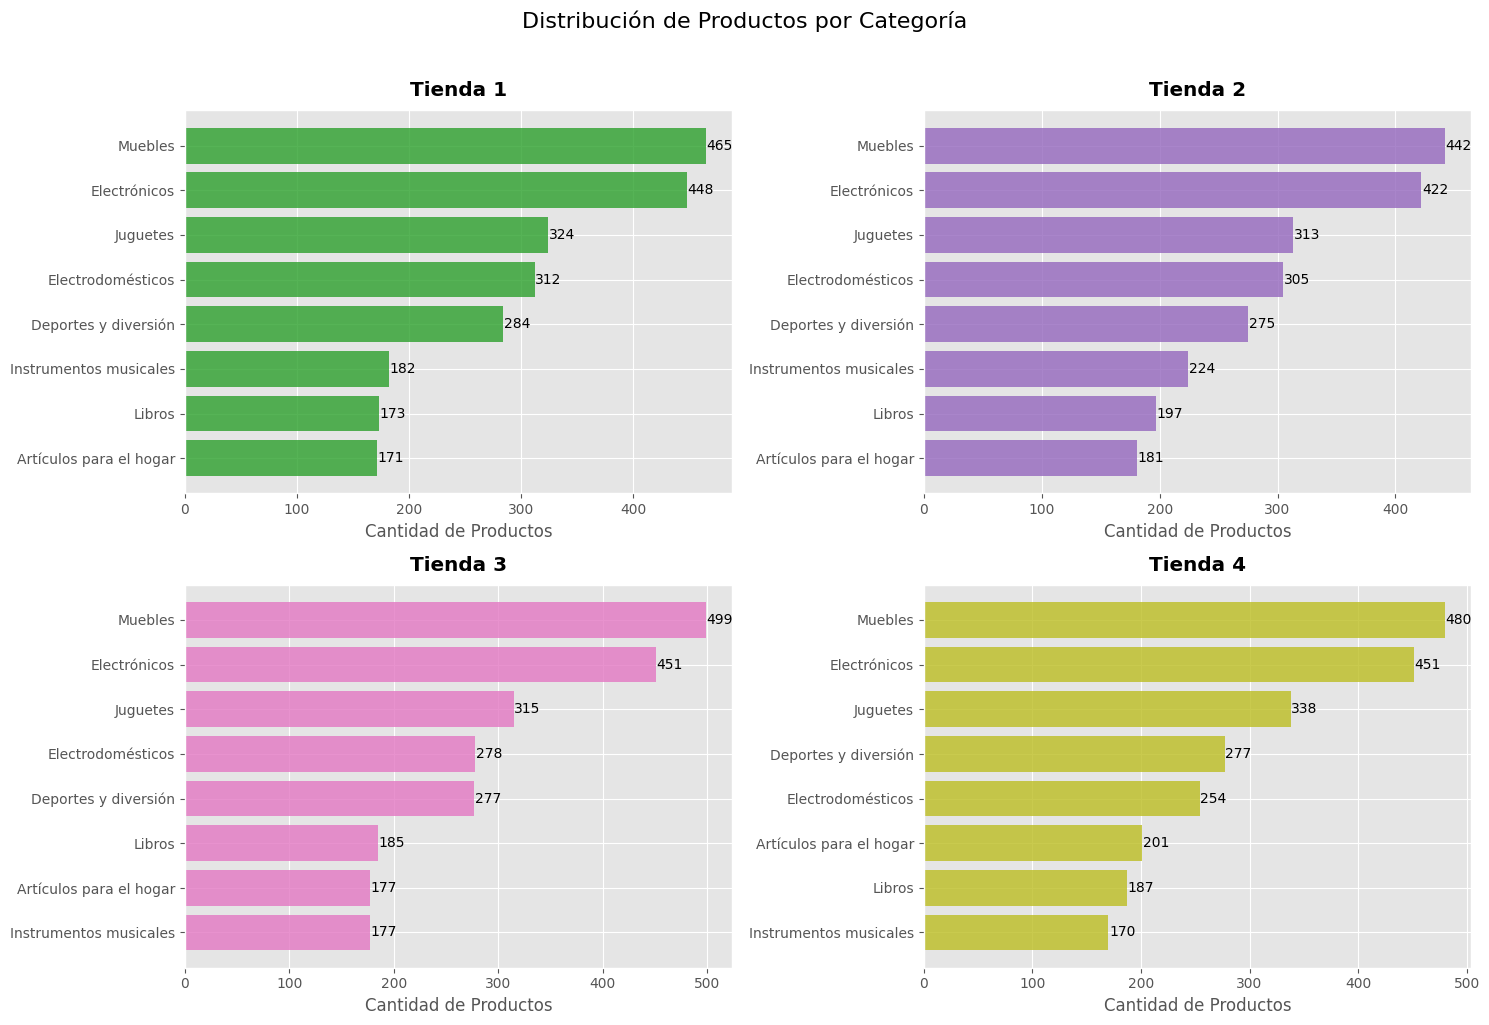

In [21]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
  conteo = df.groupby("Categoría del Producto").size()\
              .reset_index(name='Cantidad')\
              .sort_values('Cantidad', ascending=False)

  plt.subplot(2, 2, i)

  bars = plt.barh(
            conteo["Categoría del Producto"],
            conteo["Cantidad"],
            color=plt.cm.tab20(i*4),
            alpha=0.8
    )

  plt.title(f'Tienda {i}', fontweight='bold',pad=10)
  plt.xlabel('Cantidad de Productos')
  plt.gca().invert_yaxis()

  for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5,
                bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                va='center')

plt.suptitle('Distribución de Productos por Categoría', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
#Creamos el calculo del promedio de calificación de cada tienda.
calculo_promedio = pd.DataFrame({
    "Tienda": [f'Tienda {i}' for i in range(1, 5)],
    "Calificación promedio": [tienda["Calificación"].mean(),
                              tienda2["Calificación"].mean(),
                              tienda3["Calificación"].mean(),
                              tienda4["Calificación"].mean()]
                                                              })

#Ordenamos de mayor a menor calificación
calculo_promedio = calculo_promedio.sort_values("Calificación promedio", ascending=False).reset_index(drop=True)

print("\nCalificación promedio de cada tienda:")
print(calculo_promedio)


Calificación promedio de cada tienda:
     Tienda  Calificación promedio
0  Tienda 3               4.048326
1  Tienda 2               4.037304
2  Tienda 4               3.995759
3  Tienda 1               3.976685


# 4. Productos más y menos vendidos

In [ ]:
'''
Creamos la función para analizar los productos más y menos vendidos en cada tienda
Ordenamos de mayor a menor cantidad de productos vendidos.
'''

def productos_mas_menos_vendidos(tienda, numero_tienda):
  ventas_producto = tienda ["Producto"].value_counts().reset_index()
  ventas_producto.columns = ["Producto", "Cantidad"]

  ventas_producto = ventas_producto.sort_values("Cantidad", ascending=False)

  #Para caluclar el producto más vendido y el producto menos vendido
  mas_vendido = ventas_producto.iloc[0]
  menos_vendido = ventas_producto.iloc[-1]

  print(f'\nAnálisis Tienda {numero_tienda}:')
  print(f'Producto más vendido: {mas_vendido ["Producto"]} con {mas_vendido["Cantidad"]} unidades')
  print(f'Producto más vendido: {menos_vendido ["Producto"]} con {menos_vendido ["Cantidad"]} unidades')

  return ventas_producto

#Ahora aplicamos la función los datos
resultados ={}
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
  resultados[f'Tienda {i}'] = productos_mas_menos_vendidos(df, i)


Análisis Tienda 1:
Producto más vendido: Microondas con 60 unidades
Producto más vendido: Celular ABXY con 33 unidades

Análisis Tienda 2:
Producto más vendido: Iniciando en programación con 65 unidades
Producto más vendido: Juego de mesa con 32 unidades

Análisis Tienda 3:
Producto más vendido: Kit de bancas con 57 unidades
Producto más vendido: Bloques de construcción con 35 unidades

Análisis Tienda 4:
Producto más vendido: Cama box con 62 unidades
Producto más vendido: Guitarra eléctrica con 33 unidades


# 5. Envío promedio por tienda

In [16]:
#Creamos una funciones para calcular el costo promedio de envío
def calcular_costo_promedio_envio(df_tiendas):
  for i, df in enumerate(df_tiendas, start=1):
        df["Tienda"] = f'Tienda {i}'

  datos_completos = pd.concat(df_tiendas)
  costo_promedio = (datos_completos.groupby("Tienda")["Costo de envío"]
                    .mean()
                    .reset_index()
                    .sort_values("Costo de envío", ascending=False))

  costo_promedio.columns = ["Tienda", "Costo promedio de envío"]

  return costo_promedio

#Aplicamos la función a los datos
resultados = calcular_costo_promedio_envio([tienda, tienda2, tienda3, tienda4])
print(resultados)

     Tienda  Costo promedio de envío
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167
